In [22]:
import pandas as pd
from dataset import RDDDataset

countries = ["Norway", "China_Drone", "China_MotorBike", "Czech", "India", "Japan", "United_States"]

In [23]:
import pathlib
from ultralytics.yolo.utils import DEFAULT_CFG
from ultralytics.yolo.cfg import get_cfg


coco_file = pathlib.Path().parent / "config.yaml"
print(str(coco_file))
hyp = get_cfg(DEFAULT_CFG, None)
data = {
            "path": "rd2022",
            "names": {0: "d00", 1: "d10", 2: "d20", 3: "d40"},
            "nc": 4,
        }

datasets = {c: RDDDataset(
    img_path="all",
    hyp = hyp,
    countries=[c],
    data = data,
    pretrain=True
    )
    for c in countries
    }

config.yaml
/home/constantin/OneDrive/Uni/Master/4. Semester/Computer Vision and Deep Learning/Assignments/TDT4265_project/data/rdd2022/RDD2022/Norway/train/pretrain-split.json


Scanning /home/constantin/OneDrive/Uni/Master/4. Semester/Computer Vision and Deep Learning/Assignments/TDT4265_project/data/rdd2022/RDD2022/Norway/train/annotations/xmls/train.cache... 8161 images, 5247 backgrounds, 0 corrupt: 100%|██████████| 8161/8161 [00:00<?, ?it/s]


/home/constantin/OneDrive/Uni/Master/4. Semester/Computer Vision and Deep Learning/Assignments/TDT4265_project/data/rdd2022/RDD2022/China_Drone/train/pretrain-split.json


Scanning /home/constantin/OneDrive/Uni/Master/4. Semester/Computer Vision and Deep Learning/Assignments/TDT4265_project/data/rdd2022/RDD2022/China_Drone/train/annotations/xmls/train.cache... 2401 images, 482 backgrounds, 0 corrupt: 100%|██████████| 2401/2401 [00:00<?, ?it/s]


/home/constantin/OneDrive/Uni/Master/4. Semester/Computer Vision and Deep Learning/Assignments/TDT4265_project/data/rdd2022/RDD2022/China_MotorBike/train/pretrain-split.json


Scanning /home/constantin/OneDrive/Uni/Master/4. Semester/Computer Vision and Deep Learning/Assignments/TDT4265_project/data/rdd2022/RDD2022/China_MotorBike/train/annotations/xmls/train.cache... 1977 images, 43 backgrounds, 0 corrupt: 100%|██████████| 1977/1977 [00:00<?, ?it/s]


/home/constantin/OneDrive/Uni/Master/4. Semester/Computer Vision and Deep Learning/Assignments/TDT4265_project/data/rdd2022/RDD2022/Czech/train/pretrain-split.json


Scanning /home/constantin/OneDrive/Uni/Master/4. Semester/Computer Vision and Deep Learning/Assignments/TDT4265_project/data/rdd2022/RDD2022/Czech/train/annotations/xmls/train.cache... 2829 images, 1757 backgrounds, 0 corrupt: 100%|██████████| 2829/2829 [00:00<?, ?it/s]


/home/constantin/OneDrive/Uni/Master/4. Semester/Computer Vision and Deep Learning/Assignments/TDT4265_project/data/rdd2022/RDD2022/India/train/pretrain-split.json


Scanning /home/constantin/OneDrive/Uni/Master/4. Semester/Computer Vision and Deep Learning/Assignments/TDT4265_project/data/rdd2022/RDD2022/India/train/annotations/xmls/train.cache... 7706 images, 4483 backgrounds, 0 corrupt: 100%|██████████| 7706/7706 [00:00<?, ?it/s]


/home/constantin/OneDrive/Uni/Master/4. Semester/Computer Vision and Deep Learning/Assignments/TDT4265_project/data/rdd2022/RDD2022/Japan/train/pretrain-split.json


Scanning /home/constantin/OneDrive/Uni/Master/4. Semester/Computer Vision and Deep Learning/Assignments/TDT4265_project/data/rdd2022/RDD2022/Japan/train/annotations/xmls/train.cache... 10506 images, 2606 backgrounds, 0 corrupt: 100%|██████████| 10506/10506 [00:00<?, ?it/s]


/home/constantin/OneDrive/Uni/Master/4. Semester/Computer Vision and Deep Learning/Assignments/TDT4265_project/data/rdd2022/RDD2022/United_States/train/pretrain-split.json


Scanning /home/constantin/OneDrive/Uni/Master/4. Semester/Computer Vision and Deep Learning/Assignments/TDT4265_project/data/rdd2022/RDD2022/United_States/train/annotations/xmls/train.cache... 4805 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4805/4805 [00:00<?, ?it/s]


In [24]:
for c, ds in datasets.items():
    print(ds.data_dir)
    print(len(ds.labels))
    print(len(ds.train_ids) + len(ds.val_ids))

[PosixPath('/home/constantin/OneDrive/Uni/Master/4. Semester/Computer Vision and Deep Learning/Assignments/TDT4265_project/data/rdd2022/RDD2022/Norway/train')]
8161
8161
[PosixPath('/home/constantin/OneDrive/Uni/Master/4. Semester/Computer Vision and Deep Learning/Assignments/TDT4265_project/data/rdd2022/RDD2022/China_Drone/train')]
2401
2401
[PosixPath('/home/constantin/OneDrive/Uni/Master/4. Semester/Computer Vision and Deep Learning/Assignments/TDT4265_project/data/rdd2022/RDD2022/China_MotorBike/train')]
1977
1977
[PosixPath('/home/constantin/OneDrive/Uni/Master/4. Semester/Computer Vision and Deep Learning/Assignments/TDT4265_project/data/rdd2022/RDD2022/Czech/train')]
2829
2829
[PosixPath('/home/constantin/OneDrive/Uni/Master/4. Semester/Computer Vision and Deep Learning/Assignments/TDT4265_project/data/rdd2022/RDD2022/India/train')]
7706
7706
[PosixPath('/home/constantin/OneDrive/Uni/Master/4. Semester/Computer Vision and Deep Learning/Assignments/TDT4265_project/data/rdd2022/RD

In [25]:
data = {
    "country": [],
    "bbox_x_n": [],
    "bbox_y_n": [],
    "bbox_w_n": [],
    "bbox_h_n": [],
    "cls": [],
    "file": [],
    "img_height": [],
    "img_width": [],
    "file": []
}
for country, dl in datasets.items():
    for lbl in dl.labels:
        num_boxes = lbl["cls"].shape[0]
        data["cls"].extend(lbl["cls"][:, 0].tolist())
        data["bbox_x_n"].extend(lbl["bboxes"][:, 0].tolist())
        data["bbox_y_n"].extend(lbl["bboxes"][:, 1].tolist())
        data["bbox_w_n"].extend(lbl["bboxes"][:, 2].tolist())
        data["bbox_h_n"].extend(lbl["bboxes"][:, 3].tolist())
        
        data["img_height"].extend([lbl["shape"][0]]*num_boxes)
        data["img_width"].extend([lbl["shape"][1]]*num_boxes)
        data["file"].extend([lbl["im_file"]]*num_boxes)
        data["country"].extend([country]*num_boxes)

df = pd.DataFrame(data)

In [26]:
df.head

<bound method NDFrame.head of              country  bbox_x_n  bbox_y_n  bbox_w_n  bbox_h_n  cls  \
0             Norway  0.045883  0.899535  0.085726  0.104508  0.0   
1             Norway  0.824327  0.736257  0.018817  0.079765  0.0   
2             Norway  0.035393  0.826089  0.048430  0.037784  0.0   
3             Norway  0.108508  0.771935  0.097800  0.068850  0.0   
4             Norway  0.219247  0.658168  0.127425  0.160377  0.0   
...              ...       ...       ...       ...       ...  ...   
55002  United_States  0.496094  0.806250  0.117188  0.384375  0.0   
55003  United_States  0.060937  0.779687  0.112500  0.100000  0.0   
55004  United_States  0.295312  0.746875  0.043750  0.109375  0.0   
55005  United_States  0.376563  0.663281  0.071875  0.023438  1.0   
55006  United_States  0.588281  0.769531  0.107813  0.042188  1.0   

                                                    file  img_height  \
0      /home/constantin/OneDrive/Uni/Master/4. Semest...        2041 

In [48]:
class_map = {0: "d00", 1: "d10", 2: "d20", 3: "d40"}

df["cls"] = df["cls"].map(class_map)

df

,country,bbox_x_n,bbox_y_n,bbox_w_n,bbox_h_n,cls,file,img_height,img_width,bbox_x,bbox_y,bbox_w,bbox_h,area_n,area
0,Norway,0.045883,0.899535,0.085726,0.104508,d00,/home/constantin/OneDrive/Uni/Master/4. Semest...,2041,3643,167.150,1835.950,312.30,213.30,0.008959,66613.5900
1,Norway,0.824327,0.736257,0.018817,0.079765,d00,/home/constantin/OneDrive/Uni/Master/4. Semest...,2041,3643,3003.025,1502.700,68.55,162.80,0.001501,11159.9400
2,Norway,0.035393,0.826089,0.048430,0.037784,d00,/home/constantin/OneDrive/Uni/Master/4. Semest...,2044,3650,129.185,1688.525,176.77,77.23,0.001830,13651.9471
3,Norway,0.108508,0.771935,0.097800,0.068850,d00,/home/constantin/OneDrive/Uni/Master/4. Semest...,2044,3650,396.055,1577.835,356.97,140.73,0.006734,50236.3881
4,Norway,0.219247,0.658168,0.127425,0.160377,d00,/home/constantin/OneDrive/Uni/Master/4. Semest...,2044,3650,800.250,1345.295,465.10,327.81,0.020436,152464.4310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55002,United_States,0.496094,0.806250,0.117188,0.384375,d00,/home/constantin/OneDrive/Uni/Master/4. Semest...,640,640,317.500,516.000,75.00,246.00,0.045044,18450.0000
55003,United_States,0.060937,0.779687,0.112500,0.100000,d00,/home/constantin/OneDrive/Uni/Master/4. Semest...,640,640,39.000,499.000,72.00,64.00,0.011250,4608.0000
55004,United_States,0.295312,0.746875,0.043750,0.109375,d00,/home/constantin/OneDrive/Uni/Master/4. Semest...,640,640,189.000,478.000,28.00,70.00,0.004785,1960.0000
55005,United_States,0.376563,0.663281,0.071875,0.023438,d10,/home/constantin/OneDrive/Uni/Master/4. Semest...,640,640,241.000,424.500,46.00,15.00,0.001685,690.0000


In [27]:
df["bbox_x"] = df["bbox_x_n"] * df["img_width"]
df["bbox_y"] = df["bbox_y_n"] * df["img_height"]
df["bbox_w"] = df["bbox_w_n"] * df["img_width"]
df["bbox_h"] = df["bbox_h_n"] * df["img_height"]

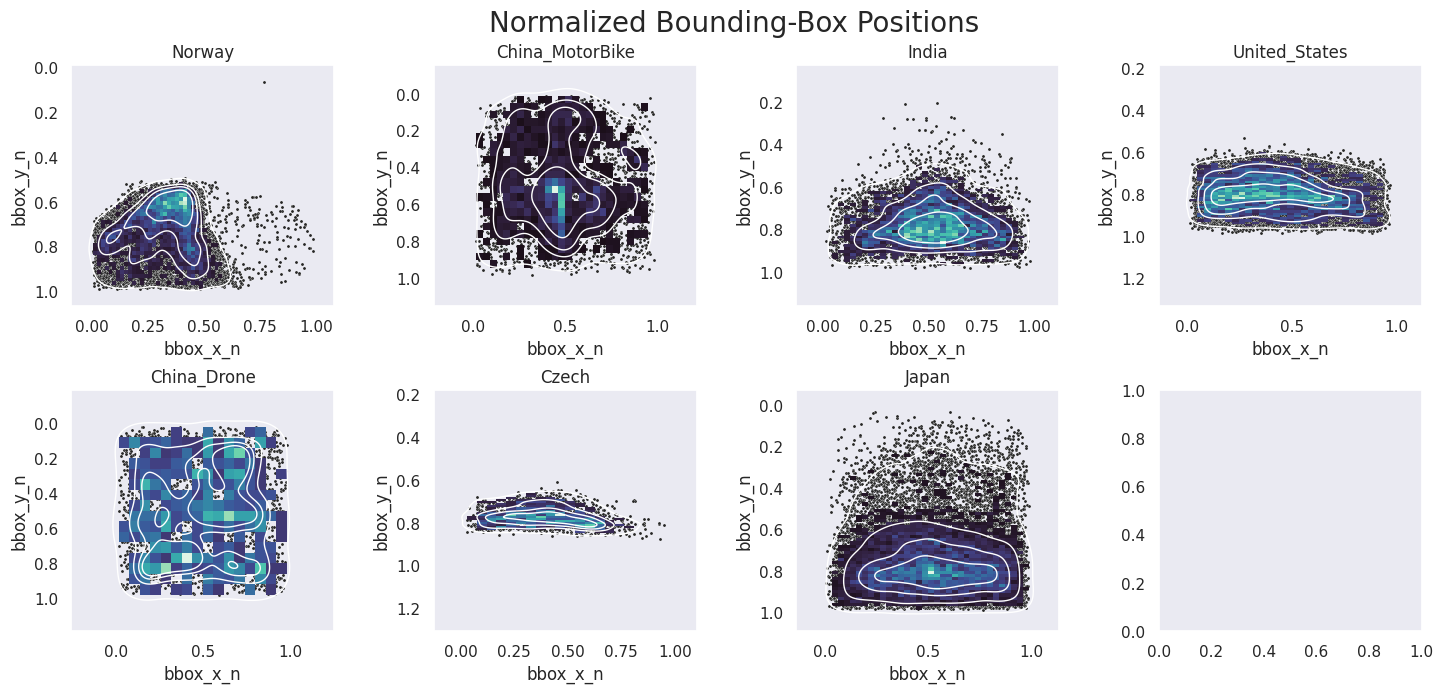

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 7]
sns.set()
sns.set_theme(style="dark")
fig, axes = plt.subplots(2, 4)
fig.tight_layout(pad=3)
fig.suptitle("Normalized Bounding-Box Positions", y=1, size=20)

for i, country in enumerate(countries):
    x = i // 2
    y = i % 2 
    axes[y, x].set_title(country)
    axes[y, x].set_xlim([0,1])
    axes[y, x].set_ylim([0,1])
    axes[y, x].invert_yaxis()
    axes[y, x].axis("equal")
    data = df[df["country"] == country]
    sns.scatterplot(
        data= data,
        x="bbox_x_n",
        y="bbox_y_n",
        color=".15",
        s=5,
        ax=axes[y, x])
    sns.histplot(data=data, x="bbox_x_n", y="bbox_y_n", pthresh=.1, cmap="mako", ax=axes[y, x])
    sns.kdeplot(data=data, x="bbox_x_n", y="bbox_y_n", levels=5, color="w", linewidths=1, ax=axes[y, x])

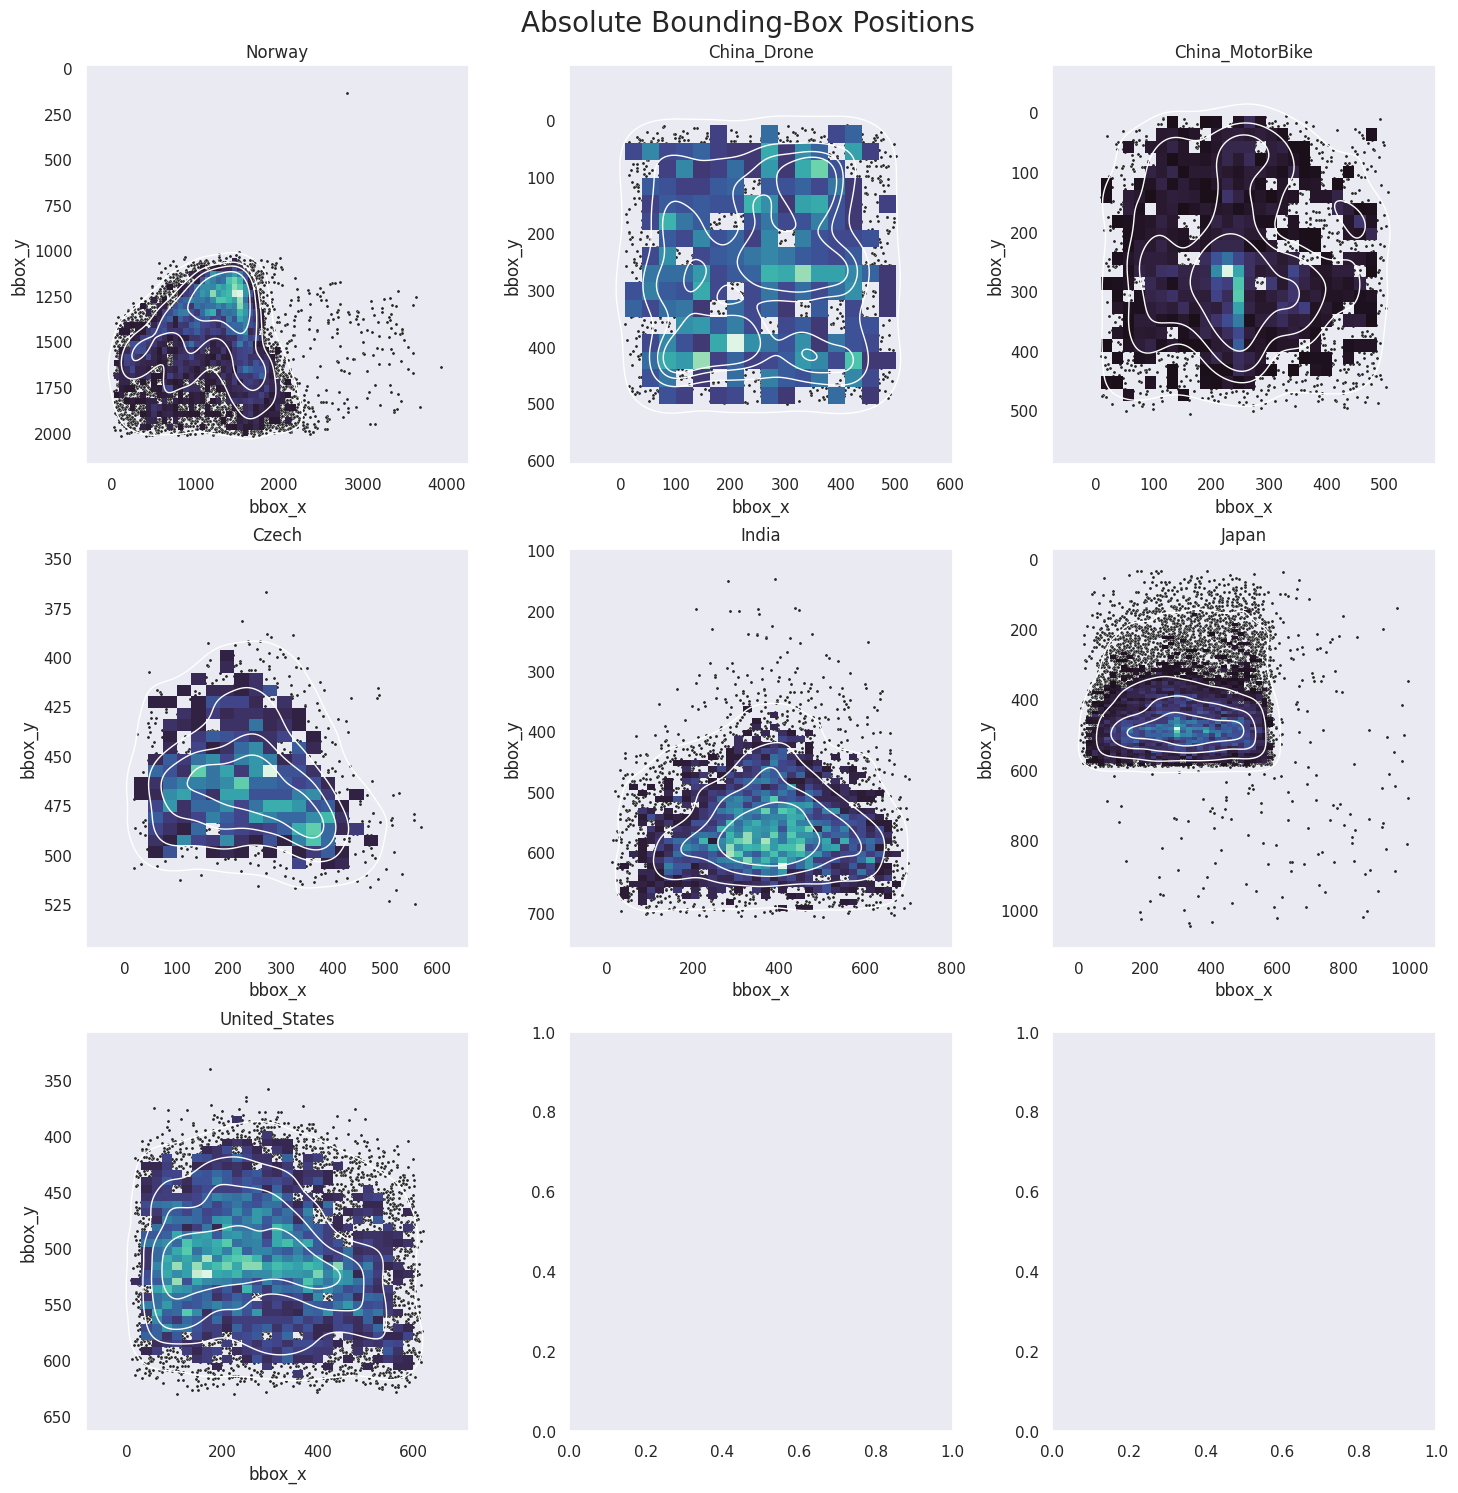

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15]
sns.set()
sns.set_theme(style="dark")
fig, axes = plt.subplots(3, 3)
fig.tight_layout(pad=3)
fig.suptitle("Absolute Bounding-Box Positions", y=1, size=20)

for i, country in enumerate(countries):
    x = i % 3
    y = i // 3 
    axes[y, x].set_title(country)
    # axes[y, x].set_xlim([0,1])
    # axes[y, x].set_ylim([0,1])
    axes[y, x].invert_yaxis()
    data = df[df["country"] == country]
    sns.scatterplot(
        data= data,
        x="bbox_x",
        y="bbox_y",
        color=".15",
        s=5,
        ax=axes[y, x])
    sns.histplot(data=data, x="bbox_x", y="bbox_y", pthresh=.1, cmap="mako", ax=axes[y, x])
    sns.kdeplot(data=data, x="bbox_x", y="bbox_y", levels=5, color="w", linewidths=1, ax=axes[y, x])

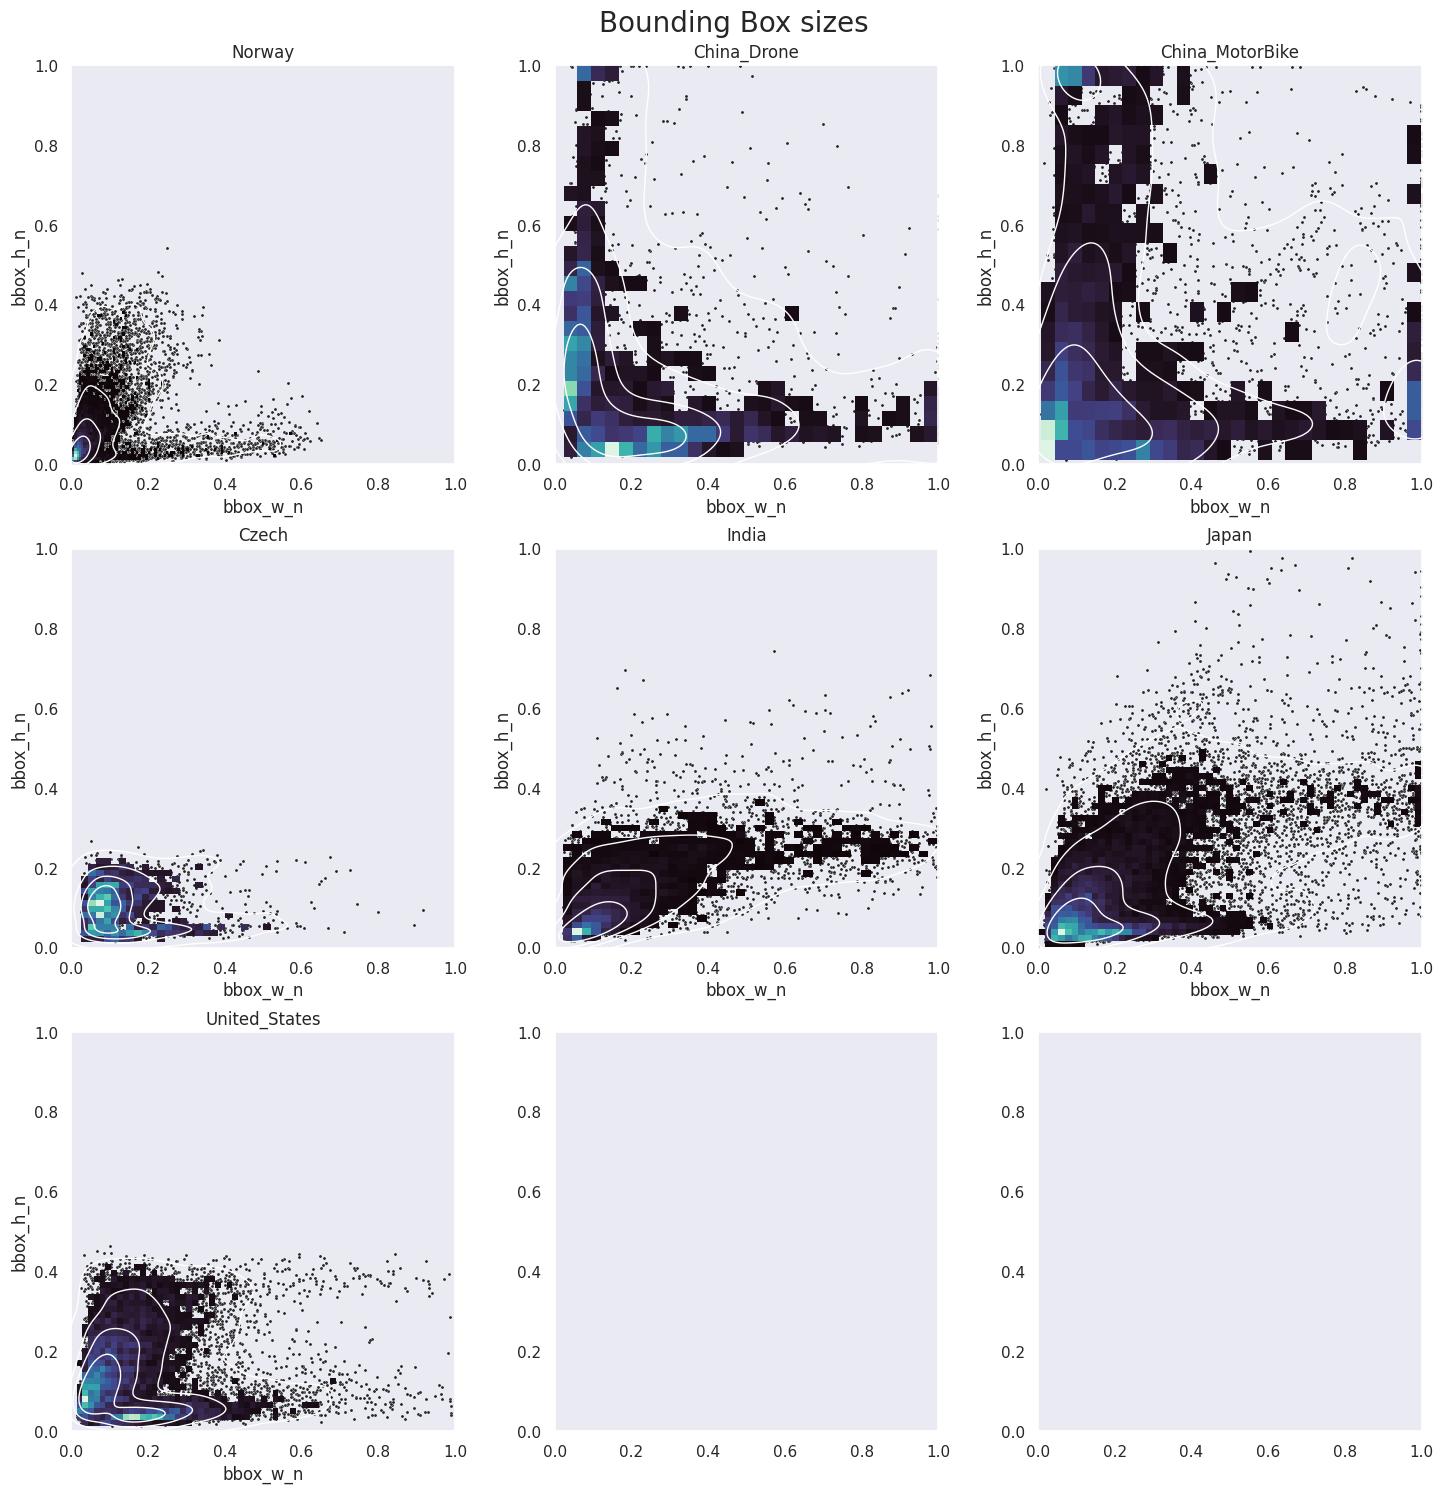

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15]
sns.set()
sns.set_theme(style="dark")
fig, axes = plt.subplots(3, 3)
fig.tight_layout(pad=3)
fig.suptitle("Bounding Box sizes", y=1, size=20)

for i, country in enumerate(countries):
    x = i % 3
    y = i // 3 
    axes[y, x].set_title(country)
    axes[y, x].set_xlim([0,1])
    axes[y, x].set_ylim([0,1])
    # axes[y, x].invert_yaxis()
    data = df[df["country"] == country]
    sns.scatterplot(
        data= data,
        x="bbox_w_n",
        y="bbox_h_n",
        color=".15",
        s=5,
        ax=axes[y, x])
    sns.histplot(data=data, x="bbox_w_n", y="bbox_h_n", pthresh=.1, cmap="mako", ax=axes[y, x])
    sns.kdeplot(data=data, x="bbox_w_n", y="bbox_h_n", levels=5, color="w", linewidths=1, ax=axes[y, x])

Text(0.5, 1.0, 'Image sizes per country')

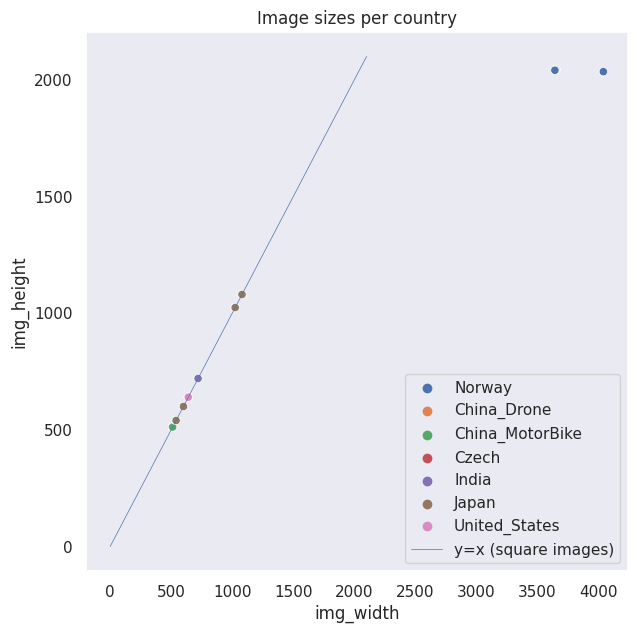

In [127]:
plt.rcParams['figure.figsize'] = [7, 7]
sns.set()
sns.set_theme(style="dark")

sns.scatterplot(
        data= df,
        x="img_width",
        y="img_height",
        hue="country")
plt.plot([0, 2100], [0, 2100], linewidth=0.5, label="y=x (square images)")
plt.legend()
plt.title("Image sizes per country")


In [31]:
df["area_n"] = df["bbox_w_n"] * df["bbox_h_n"]
df["area"] = df["bbox_w"] * df["bbox_h"]

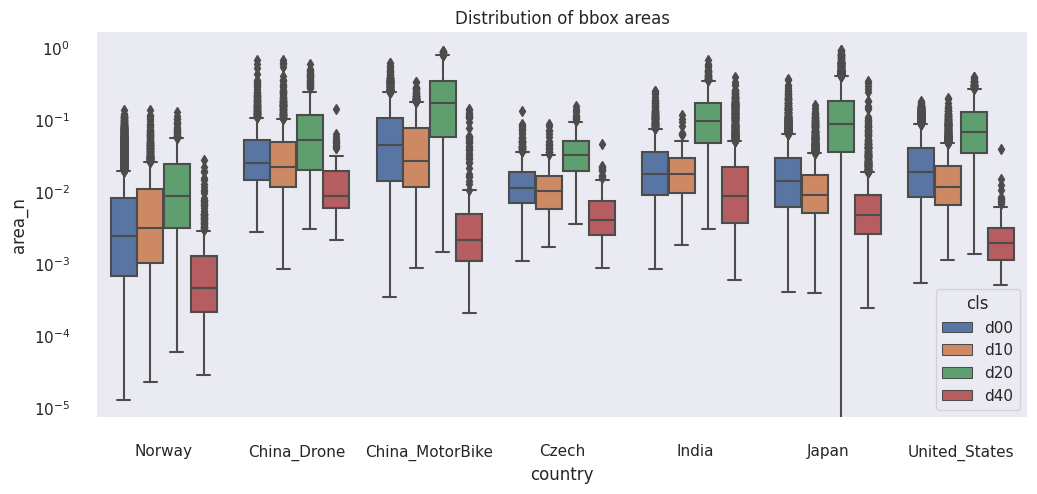

In [67]:
plt.rcParams['figure.figsize'] = [12, 5]

sns.boxplot(x="country", y="area_n",
            hue="cls",
            data=df)
plt.title("Distribution of bbox areas")
plt.yscale('log')
sns.despine(offset=10, trim=True)

In [59]:
img_data = df.drop_duplicates(subset=["file"])
img_data

,country,bbox_x_n,bbox_y_n,bbox_w_n,bbox_h_n,cls,file,img_height,img_width,bbox_x,bbox_y,bbox_w,bbox_h,area_n,area
0,Norway,0.045883,0.899535,0.085726,0.104508,d00,/home/constantin/OneDrive/Uni/Master/4. Semest...,2041,3643,167.150,1835.950,312.30,213.30,0.008959,66613.5900
2,Norway,0.035393,0.826089,0.048430,0.037784,d00,/home/constantin/OneDrive/Uni/Master/4. Semest...,2044,3650,129.185,1688.525,176.77,77.23,0.001830,13651.9471
10,Norway,0.520176,0.821656,0.151523,0.329250,d20,/home/constantin/OneDrive/Uni/Master/4. Semest...,2041,3643,1895.000,1677.000,552.00,672.00,0.049889,370944.0000
11,Norway,0.213055,0.862214,0.329671,0.274594,d20,/home/constantin/OneDrive/Uni/Master/4. Semest...,2044,3650,777.650,1762.365,1203.30,561.27,0.090526,675376.1910
13,Norway,0.156129,0.668221,0.038079,0.079194,d00,/home/constantin/OneDrive/Uni/Master/4. Semest...,2035,4040,630.760,1359.830,153.84,161.16,0.003016,24792.8544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54995,United_States,0.103125,0.903125,0.106250,0.109375,d00,/home/constantin/OneDrive/Uni/Master/4. Semest...,640,640,66.000,578.000,68.00,70.00,0.011621,4760.0000
54998,United_States,0.840625,0.932031,0.121875,0.129688,d00,/home/constantin/OneDrive/Uni/Master/4. Semest...,640,640,538.000,596.500,78.00,83.00,0.015806,6474.0000
54999,United_States,0.516406,0.739062,0.060937,0.196875,d00,/home/constantin/OneDrive/Uni/Master/4. Semest...,640,640,330.500,473.000,39.00,126.00,0.011997,4914.0000
55001,United_States,0.367188,0.598437,0.021875,0.050000,d00,/home/constantin/OneDrive/Uni/Master/4. Semest...,640,640,235.000,383.000,14.00,32.00,0.001094,448.0000


([<matplotlib.patches.Wedge at 0x7f0627fd4be0>,
 [Text(0.881439180504612, 0.6580767212653538, 'Norway'),
  Text(0.1239702531427799, 1.0929919379097521, 'China_Drone'),
  Text(-0.35421417150609585, 1.0414088153574708, 'China_MotorBike'),
  Text(-0.7028089483585948, 0.8462030383466407, 'Czech'),
  Text(-1.0182723015639532, 0.4160787423885646, 'India'),
  Text(-0.6462130200975642, -0.8901734284151518, 'Japan'),
  Text(0.8894532256617392, -0.6472039549940402, 'United_States')],
 [Text(0.48078500754797016, 0.35895093887201107, '20.4%'),
  Text(0.06762013807787993, 0.5961774206780465, '5.6%'),
  Text(-0.1932077299124159, 0.5680411720131657, '8.5%'),
  Text(-0.38335033546832437, 0.46156529364362214, '3.2%'),
  Text(-0.5554212553985199, 0.2269520413028534, '12.4%'),
  Text(-0.3524798291441259, -0.48554914277190087, '29.9%'),
  Text(0.48515630490640316, -0.35302033908765823, '20.0%')])

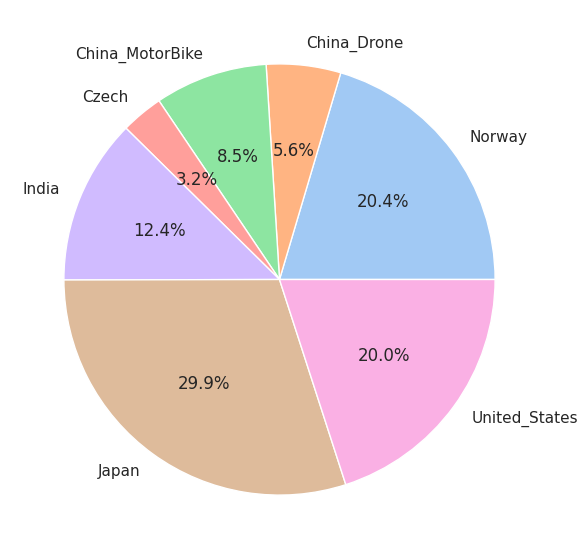

In [64]:
colors = sns.color_palette("pastel",len(countries))
plt.pie([sum(df["country"] == c) for c in countries], labels = countries, autopct='%1.1f%%', colors=colors)

<Axes: xlabel='cls', ylabel='Count'>

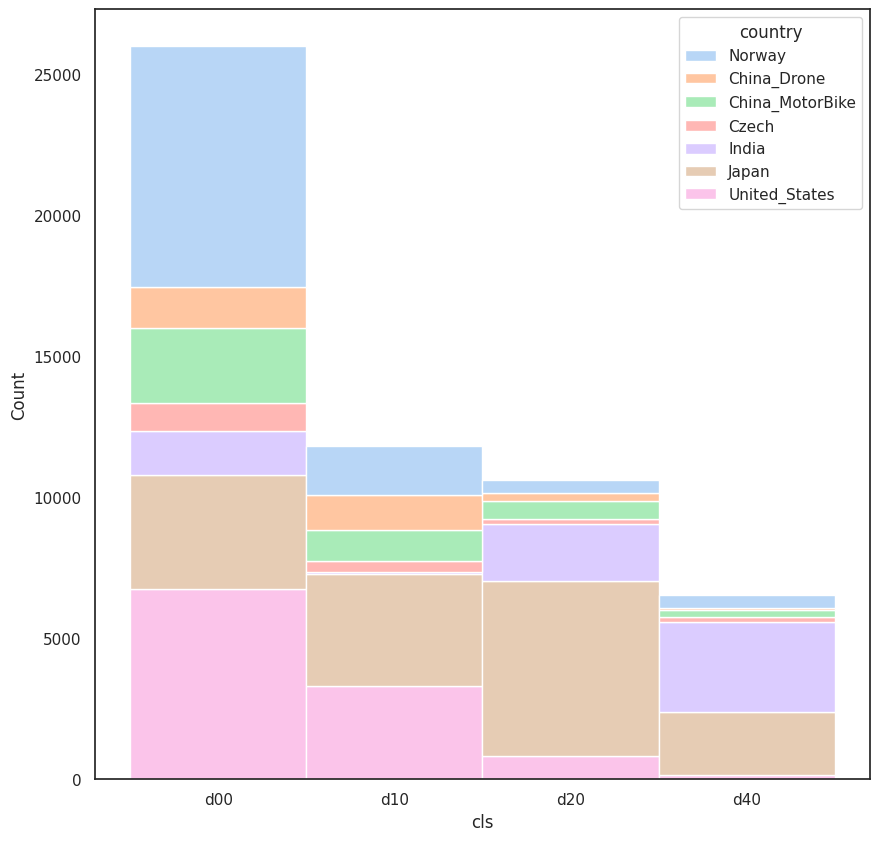

In [82]:
plt.rcParams['figure.figsize'] = [10, 10]
sns.set_theme(style='white')
sns.set_palette("pastel")
sns.histplot(
    df, x="cls", hue="country", multiple="stack"
)


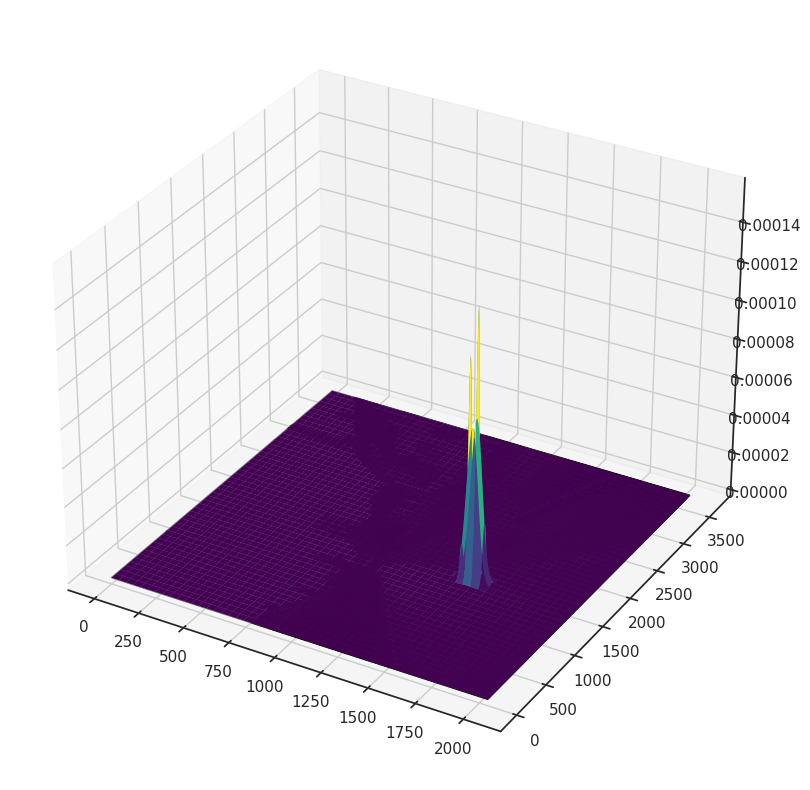

In [119]:

import cv2
from scipy.stats import multivariate_normal
import numpy as np

im_path = "/home/constantin/OneDrive/Uni/Master/4. Semester/Computer Vision and Deep Learning/Assignments/TDT4265_project/data/rdd2022/RDD2022/Norway/train/images/Norway_000008.jpg"
img = cv2.imread(im_path)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Orgird to store data
x, y = np.ogrid[0:img.shape[0], 0:img.shape[1]]
# In Python3 matplotlib assumes rgbdata in range 0.0 to 1.0
img = img.astype('float32')/255
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x, y, np.atleast_2d(0), rstride=10, cstride=10, facecolors=img)
# ax.set_aspect('equal')

mu_x = 1500
variance_x =  1000

mu_y = 1500
variance_y = 1000

#Create grid and multivariate normal
x = np.linspace(0,img.shape[0],500)
y = np.linspace(0,img.shape[1],500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal([mu_x, mu_y], [[variance_x, 0], [0, variance_y]])
z = rv.pdf(pos)
ax.plot_surface(X, Y, z, cmap='viridis',linewidth=0)
# ax.set_zlim([0, 1.5])

fig.savefig("results.png")


In [123]:
df["anchor_ratio_n"] = df["bbox_w_n"] / df["bbox_h_n"]

<Axes: xlabel='anchor_ratio_n', ylabel='Count'>

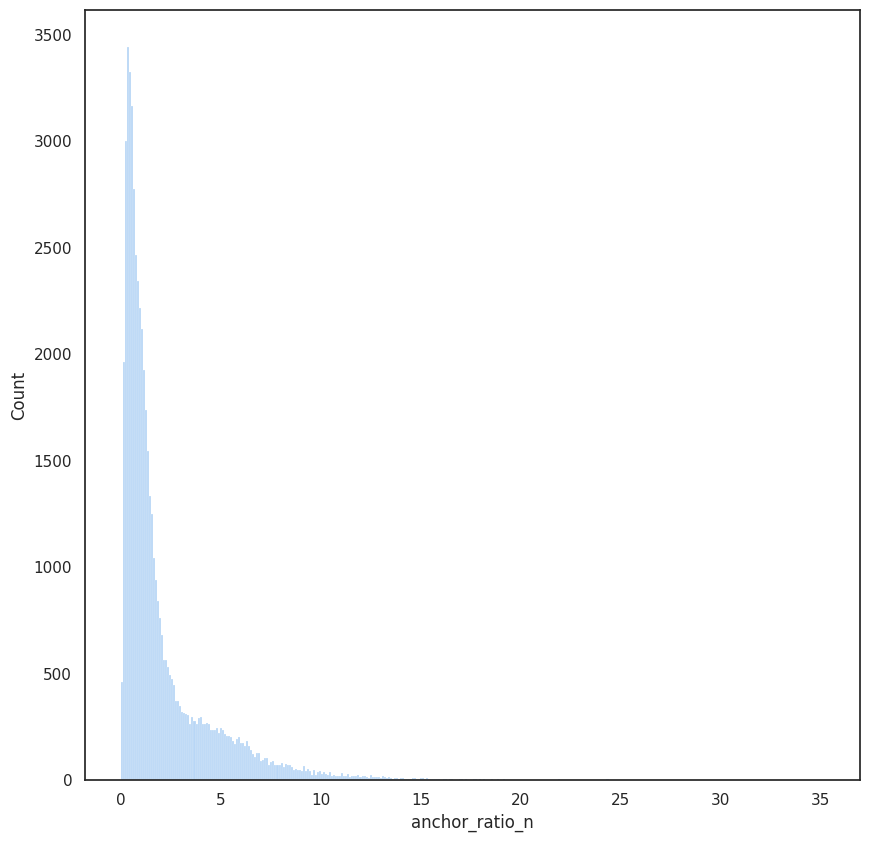

In [124]:
sns.histplot(data=df, x="anchor_ratio_n")